In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('../day5/data/tree_animals.xlsx')
data.head(10)

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Human,Warm,Yes,No,No,Yes,Mammals
1,Python,Cold,No,No,No,No,Reptiles
2,Bat,Warm,Yes,Yes,No,Yes,Mammals
3,Frog,Cold,No,No,Sometimes,Yes,Amphibians
4,Salmon,Cold,No,No,Yes,No,Fishes
5,Whale,Warm,Yes,No,Yes,No,Mammals
6,Komodo,Cold,No,No,No,Yes,Reptiles
7,Pigeon,Warm,No,Yes,No,Yes,Birds
8,Cat,Warm,Yes,No,No,Yes,Mammals
9,Leopard Shark,Cold,Yes,No,Yes,No,Fishes


In [3]:
data.drop(columns=['Name'], inplace=True)
data.head()

,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Warm,Yes,No,No,Yes,Mammals
1,Cold,No,No,No,No,Reptiles
2,Warm,Yes,Yes,No,Yes,Mammals
3,Cold,No,No,Sometimes,Yes,Amphibians
4,Cold,No,No,Yes,No,Fishes


In [4]:
encoders = []
for i in range(0, len(data.columns) - 1):
    encode = LabelEncoder()
    data.iloc[:,i] = encode.fit_transform(data.iloc[:,i])
    encoders.append(encode)
data.head()

,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,1,1,0,0,1,Mammals
1,0,0,0,0,0,Reptiles
2,1,1,1,0,1,Mammals
3,0,0,0,1,1,Amphibians
4,0,0,0,2,0,Fishes


In [5]:
x = data.iloc[:,0:5]
y = data['Species']
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [8]:
x_pred = ['Warm', 'No', 'Yes', 'Sometimes', 'No']
for i in range(0, len(data.columns) - 1):
    x_pred[i] = encoders[i].transform([x_pred[i]])
x_pred_a = np.array(x_pred).reshape(-1,5)
y_pred = model.predict(x_pred_a)
print("prediction:",y_pred[0])
score= model.score(x,y)
print('Accuracy','{:.2f}'.format(score))

prediction: Birds
Accuracy 0.95


c:\Users\User\Documents\sut_ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


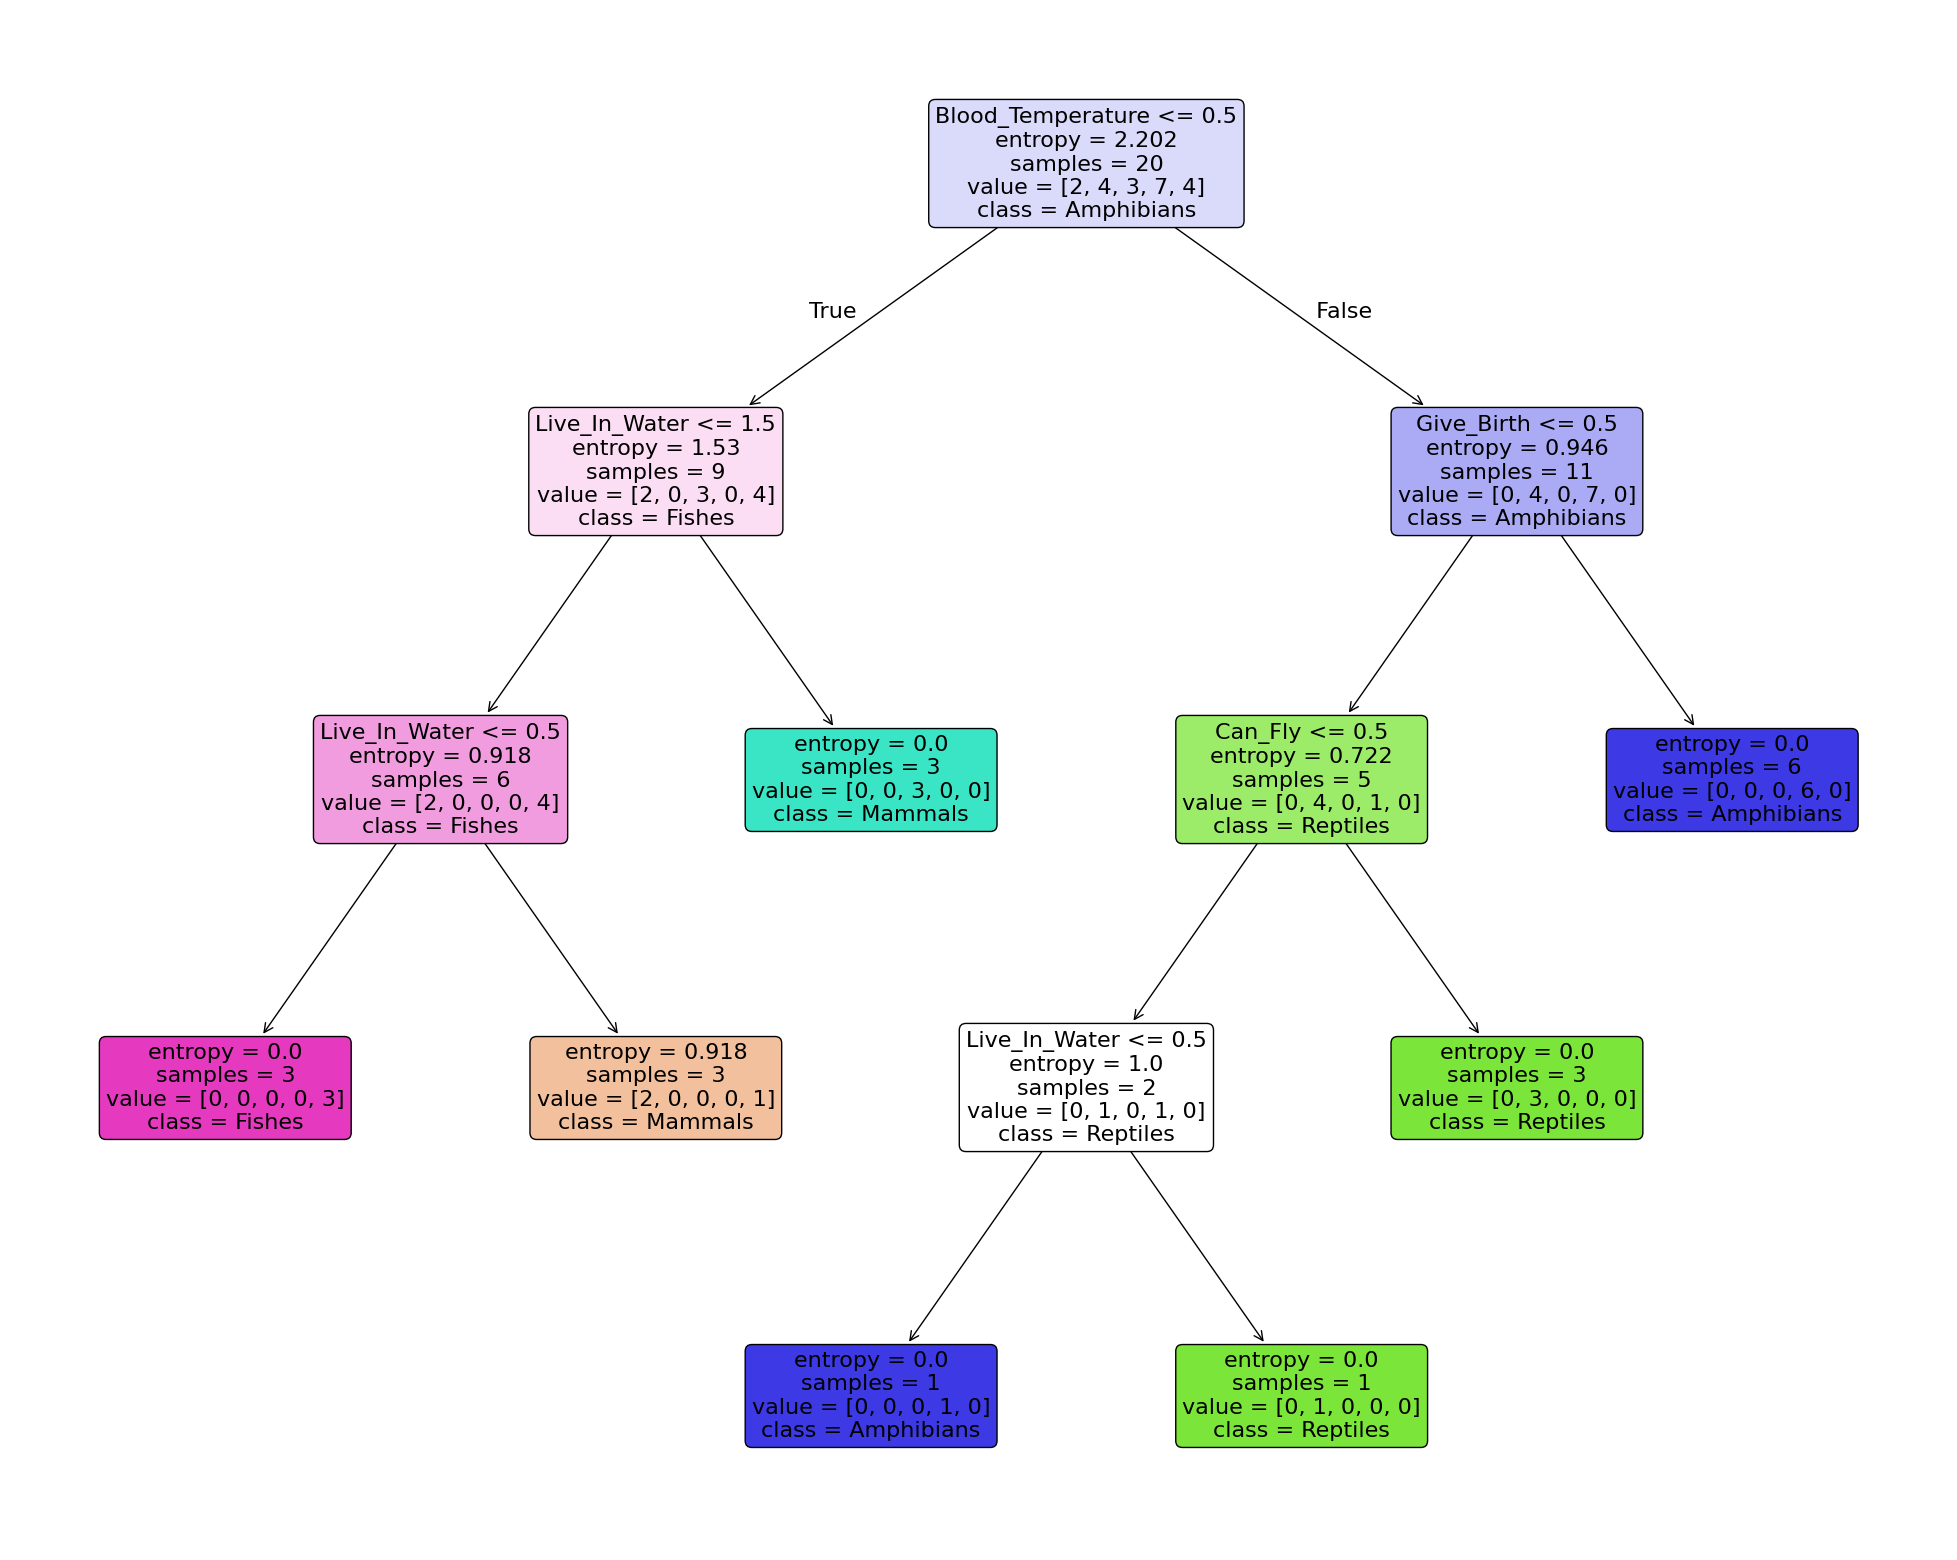

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
t = plot_tree(model,
              feature_names=x.columns,
              class_names=y,
              label='all',
              impurity=True,
              precision=3,
              filled=True,
              rounded=True,
              fontsize=16)